In [4]:

import os
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt

# **Loading the Dataset**

In [5]:
from google.colab import drive

drive.mount('/content/drive')
path = "drive/MyDrive/ColabNotebooks/football_data.csv"
data = pd.read_csv(path)
data.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(18207, 89)

In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Implement k-means clustering algorithm from scratch.

#removing irrelevant columns (here Unnamed Column)
if('Unnamed: 0' in data.columns):
  print("here")
  data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.columns)


data.shape



here
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', '

(18207, 88)

# **Cleaning and Modifying the data**

In [8]:
#cleaning data


  #altering values of  all positioncloumns
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

def tune(val,namee):
  if ((type(val)==str) and (namee in positions) ):
      val = val.split('+')
      val = int (val[0]) + int (val[1])
  elif ((type(val)==str) and (namee == "Preferred Foot")):
    if ( val == "Left"):
      return 0
    else:
      return 1
  return val

for pos in positions:
  data[pos] = data[pos].apply(tune,args=(pos,))
data['Preferred Foot'] = data['Preferred Foot'].apply(tune,args=('Preferred Foot',))


In [9]:
#altering values of Cloumn Wage,Value,Weight

import re
def fixsuffixes(val,namee):
  
  if ((namee == "Weight") and (type(val) == str)):
    
    return float(val.replace('lbs',''))

  if ((namee == "Wage") or (namee == "Value")):
    # print(val,namee)
    if (val!= val):
      return 0
    if (type(val) == str):
      val=re.sub('[^A-Z0-9\.]','',val)
      if val[-1] not in ['K','M']:
        return 0
      else:
        if val[-1] in ['M']:
          
          return float(val[:-1])*1000000
        else:
          return float(val[:-1])*1000
  if namee == "Height" and type(val)==str:
    val = val.split('\'')
    return float(val[0])*12 + float(val[1])

def allalters():
  cols = ["Value","Wage","Weight","Height"]
  for i in cols:
    # print (i)
    data[i]=data[i].apply(fixsuffixes,args=(i,))

allalters()
data.reset_index(drop = True)




,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,0.0,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,67.0,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,...,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,1.0,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,74.0,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,...,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,1.0,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,69.0,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,...,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,1.0,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,1.0,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,71.0,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,...,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,60000.0,1000.0,1307,

In [10]:
data.drop(data.select_dtypes(include=[object]),axis = 1,inplace=True)
#removing unnecessary or empty entries
data=data.dropna()
data.reset_index(drop = True)
data.drop(['ID','Jersey Number','Value','Wage'],axis=1,inplace=True)
print(data.columns)
data


Index(['Age', 'Overall', 'Potential', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,0.0,5.0,4.0,4.0,67.0,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,1.0,5.0,4.0,5.0,74.0,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,1.0,5.0,5.0,5.0,69.0,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,91,92,2281,1.0,4.0,5.0,4.0,71.0,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,91,2142,1.0,4.0,4.0,4.0,68.0,163.0,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,1.0,1.0,2.0,2.0,69.0,134.0,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,1098,1.0,1.0,2.0,2.0,75.0,170.0,47.0,47.0,47.0,41.0,44.0,44.0,44.0,41.0,42.0,42.0,42.0,40.0,37.0,37.0,37.0,40.0,32.0,33.0,33.0,33.0,32.0,31.0,34.0,34.0,34.0,31.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,1189,1.0,1.0,3.0,2.0,68.0,148.0,47.0,47.0,47.0,47.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,46.0,40.0,40.0,40.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,30.0,30.0,30.0,35.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,1228,1.0,1.0,3.0,2.0,70.0,154.0,49.0,49.0,49.0,49.0,48.0,48.0,48.0,49.0,47.0,47.0,47.0,48.0,41.0,41.0,41.0,48.0,38.0,34.0,34.0,34.0,38.0,37.0,33.0,33.0,33.0,37.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [11]:
from sklearn.preprocessing import StandardScaler, normalize

# Scaling the data 
scaler = StandardScaler() 
d_scaled = scaler.fit_transform(data) 

# Normalizing the data  
d_normalised = normalize(d_scaled) 

# Converting the numpy array into a pandas DataFrame 
d_normalised = pd.DataFrame(d_normalised,columns=data.columns) 
d_normalised.describe()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,-0.002316,-0.008869,-0.009714,0.004153,0.000698,-0.013324,-0.000619,-0.004442,-0.005813,-0.006103,0.000389,0.000389,0.000389,0.004091,0.002745,0.002745,0.002745,0.004091,0.003963,0.003963,0.003963,0.004876,0.004954,0.004954,0.004954,0.004876,0.005543,0.004051,0.004051,0.004051,0.005543,0.004611,0.001565,0.001565,0.001565,0.004611,0.006452,-0.000166,-0.008182,0.004663,-0.001760,0.004973,0.002361,0.001944,0.007092,0.002653,0.005314,0.005043,0.006488,-0.005491,0.005516,-0.000078,-0.001516,0.005159,-0.003928,0.002027,0.000772,0.003157,0.003180,0.004661,-0.003715,-0.004726,0.002109,0.003551,0.003816,0.000729,0.000602,0.000624,0.000690,0.000903
std,0.134162,0.113187,0.129031,0.107642,0.139766,0.089913,0.131886,0.128915,0.129041,0.128945,0.109753,0.109753,0.109753,0.105009,0.105723,0.105723,0.105723,0.105009,0.104250,0.104250,0.104250,0.103607,0.105031,0.105031,0.105031,0.103607,0.118149,0.118784,0.118784,0.118784,0.118149,0.120857,0.122365,0.122365,0.122365,0.120857,0.116870,0.121682,0.129458,0.107952,0.122606,0.106961,0.120406,0.124571,0.115286,0.104801,0.122973,0.124997,0.120148,0.116309,0.123259,0.121372,0.132533,0.130692,0.127686,0.119287,0.128064,0.125596,0.114712,0.115317,0.125111,0.120085,0.126119,0.124805,0.125807,0.137986,0.137657,0.135576,0.137344,0.136898
min,-0.430620,-0.392617,-0.476514,-0.209056,-0.469380,-0.091775,-0.567824,-0.256912,-0.508815,-0.506849,-0.216518,-0.216518,-0.216518,-0.204965,-0.205301,-0.205301,-0.205301,-0.204965,-0.204542,-0.204542,-0.204542,-0.209034,-0.198544,-0.198544,-0.198544,-0.209034,-0.252523,-0.233882,-0.233882,-0.233882,-0.252523,-0.249234,-0.243813,-0.243813,-0.243813,-0.249234,-0.511808,-0.350595,-0.598683,-0.405178,-0.409466,-0.398313,-0.341535,-0.325328,-0.457407,-0.522581,-0.530554,-0.530225,-0.468585,-0.493870,-0.612462,-0.498510,-0.535973,-0.584612,-0.555003,-0.409519,-0.515790,-0.363604,-0.410844,-0.435372,-0.471274,-0.459683,-0.441270,-0.324449,-0.316305,-0.426323,-0.449757,-0.419372,-0.602003,-0.444682
25%,-0.104770,-0.090972,-0.096623,-0.095127,0.033653,-0.046717,-0.001393,-0.115865,-0.092655,-0.092490,-0.099877,-0.099877,-0.099877,-0.082826,-0.087849,-0.087849,-0.087849,-0.082826,-0.083567,-0.083567,-0.083567,-0.082140,-0.087494,-0.087494,-0.087494,-0.082140,-0.085453,-0.091682,-0.091682,-0.091682,-0.085453,-0.094533,-0.112791,-0.112791,-0.112791,-0.094533,-0.093152,-0.113951,-0.099064,-0.074191,-0.105231,-0.067000,-0.101055,-0.100187,-0.077201,-0.075406,-0.068577,-0.067748,-0.078323,-0.091011,-0.073864,-0.084852,-0.084157,-0.07

In [12]:
X= d_normalised
for i in X:
  X[i].fillna(X[i].mean(skipna=True), inplace = True)
X.shape

(16122, 70)

In [13]:
import random
def dist(x,y):
  return (np.linalg.norm(x - y))
def every_cluster(K,min_dist,row,prevCluster,chosen_cluster):
  for k in range(K):
        curr_dist = dist(prevCluster[k],row)
        if curr_dist < min_dist:
          min_dist,chosen_cluster = curr_dist,k
  return [chosen_cluster,min_dist]

def check_for_change(dist):
  if(dist < 0.000001):
    return True
  return False
def declares(K,O):
  for i in range(K):
    O [i] = []
  return O

def cluster(K,operateset):
  #randomly choose some k number of points from dataset 
  rand_points=[]
  for i in range(K):
    rand_points.append(random.choice(np.array(operateset)))
  prevCluster = rand_points
  #now while iterating over the remaining points of dataset cluster them 
  #on calcuting distance between points and all centroids
  Output,label_list={},[]
  alteration = 0.0
  while(1):
    Output,label_list={},[]
    d_calculated = 0
    # print("K ",K)
    Output = declares(K,Output)
    # print("sz ",len(Output))
    for row in np.array(operateset):
        min_dist,chosen_cluster=dist(row,prevCluster[0]),0
        temp = every_cluster(K,min_dist,row,prevCluster,chosen_cluster)
        chosen_cluster = temp[0]
        label_list.append(chosen_cluster)
        min_dist = temp[1]        
        Output[chosen_cluster].append(row)
      
    curCluster = []
    for i in range(K):
        Output[i] = np.array(Output[i])
        curCluster.append(Output[i].mean(axis = 0))
        d_calculated+= dist(prevCluster[i],curCluster[i])
    if (check_for_change(d_calculated)==True):
        break
    prevCluster = curCluster

  temp_dist = 0.0
  print(len(prevCluster))
  print(len(label_list))
  for i in range (len(label_list)):
    data_pts = np.array(operateset)[i]
    temp_dist +=(dist(data_pts,prevCluster[label_list[i]])**2)
    alteration =  temp_dist/len(label_list)
  return [np.array(label_list),alteration]





In [14]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(d_normalised) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.describe()
X_principal



,P1,P2
0,-0.853270,0.135336
1,-0.830801,0.056195
2,-0.838788,0.133224
3,-0.884000,-0.183704
4,-0.887024,0.107222
...,...,...
16117,0.857529,0.324691
16118,0.823842,0.501880
16119,0.722311,0.647961
16120,0.704149,0.633997


3
16122


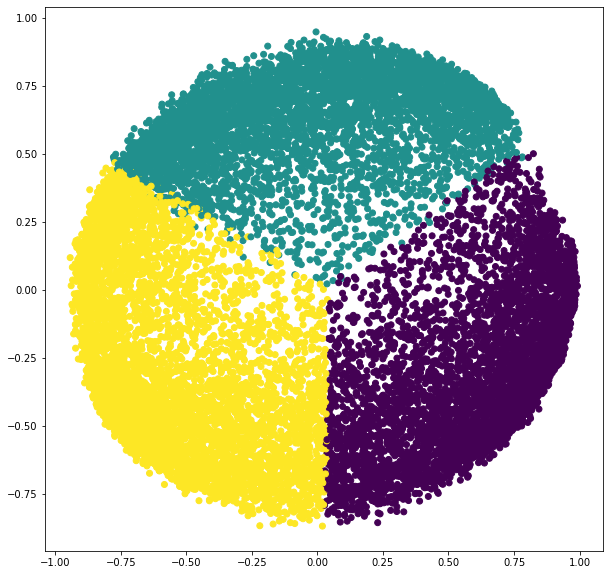

In [15]:
lk=[]
labels=['cluster1','cluster2','cluster3',]
markers = ["*" , "," , "v" ]
cl = cluster(3,X)
lk.append(cl[0])
n = lk[0]

plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'],cmap= 'viridis_r',c=n)
plt.show()

5
16122


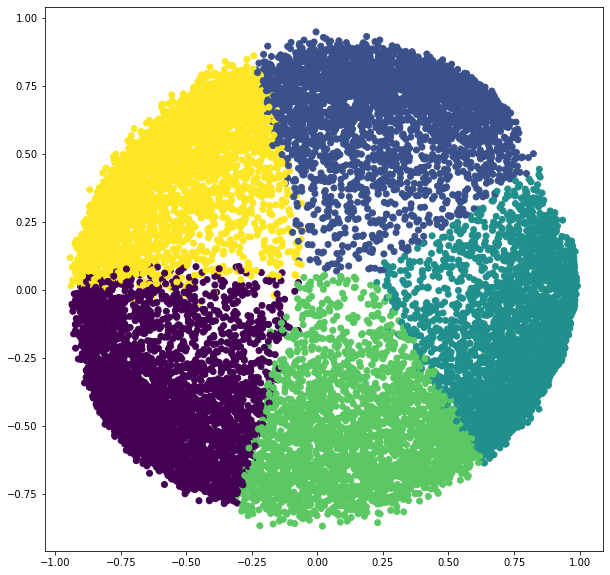

In [16]:
labels=['cluster1','cluster2','cluster3',]
markers = ["*" , "," , "v" ]
cl = cluster(5,X)
lk.append(cl[0])
n = lk[1]

plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'],cmap= 'viridis_r',c=n)
 
plt.show()

7
16122


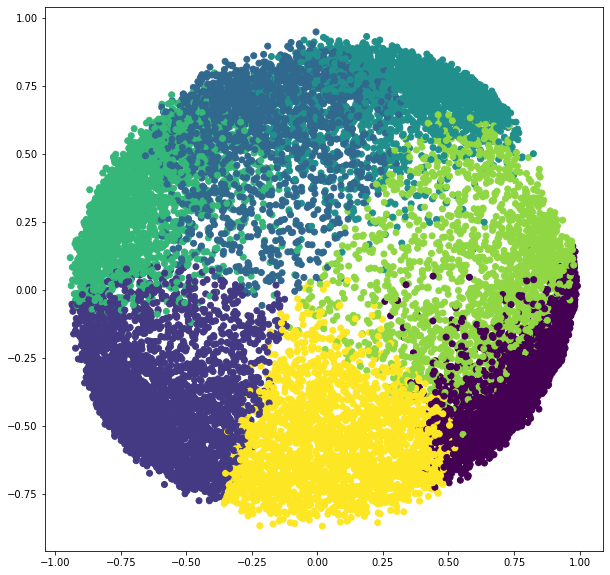

In [17]:
labels=['cluster1','cluster2','cluster3',]
markers = ["*" , "," , "v" ]
cl = cluster(7,X)
lk.append(cl[0])
n = lk[2]

plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'],cmap= 'viridis_r',c=n)
 
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score 
WCSS_array=[]
sil_array = []
for k in range(1,11):
  cl = cluster(k,X)
  if k>1 :
    sil_array.append( silhouette_score(X_principal,cl[0])) 
  WCSS_array.append(cl[1])


K_array=np.arange(1,11,1)


In [ ]:
print("Silhouette Score")
print(sil_array)

plt.plot(K_array, WCSS_array) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Alteration', fontsize = 20)
plt.show() 
